# Multiple Linear Regression for Robot Calibration

In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  In addition to reviewing the concepts in the [multiple linear regression demo](./glucose.ipynb), you will see how to use multiple linear regression for time series data -- an important concept in dynamical systems such as robotics.

The robot data for the lab is taken generously from the TU Dortmund's [Multiple Link Robot Arms Project](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html).  As part of the project, they have created an excellent public dataset: [MERIt](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="http://www.rst.e-technik.tu-dortmund.de/cms/Medienpool/redaktionelleBilder/Forschung/Schwerpunkte/TUDOR_engl/TUDORBild.png" height="200" width="200">


We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.

## Load and Visualize the Data
First, import the modules we will need.

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large.  Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  We will use the following files:
* [exp1.csv](./exp1.csv) for training
* [exp2.csv](./exp2.csv) for test

Below, I have supplied the column headers in the `names` array.  Use the `pd.read_csv` command to load the data.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.  You can review [simple linear regression demo](../simp_lin_reg/auto_mpg.ipynb) for examples of using the `pd.read_csv` command.

In [28]:
url = "https://raw.githubusercontent.com/sdrangan/introml/master/mult_lin_reg/exp1.csv"
names1 =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df = pd.read_csv(url, names= names1, index_col=0)

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [29]:
# TODO
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


From the dataframe `df`, extract the time indices into a vector `t` and extract `I2`, the current into the second joint.  Place the current in a vector `y` and plot `y` vs. `t`.  

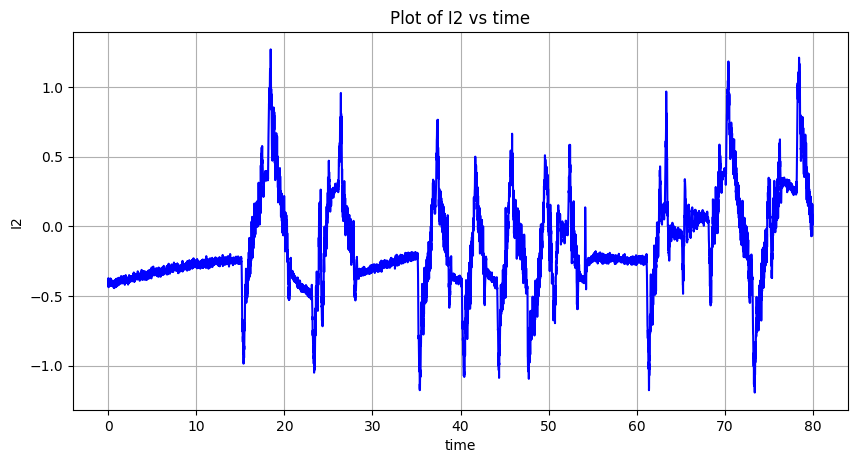

In [30]:
# TODO
# y = ...
# t = ...
# plt.plot(...)
t = df.index.tolist()
y = df['I2']
fig, axes = plt.subplots(figsize=(10,5), dpi = 100)
axes.plot(t,y, 'b')
axes.set_xlabel('time')
axes.set_ylabel('I2')
axes.grid(True)
axes.set_title('Plot of I2 vs time')

Use all the samples from the experiment 1 dataset to create the training data:
* `ytrain`:  A vector of all the samples from the `I2` column
* `Xtrain`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [31]:
# TODO
# ytrain = ...
# Xtrain = ...
xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytrain = df['I2']

## Fit a Linear Model
Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [32]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
# TODO
# regr = ...
regr = LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Train the model on the training data using the `regr.fit(...)` method.

In [33]:
# TODO
predictions = regr.predict(xtrain)

Plot the predicted and actual current `I2` over time on the same plot.  Create a legend for the plot.

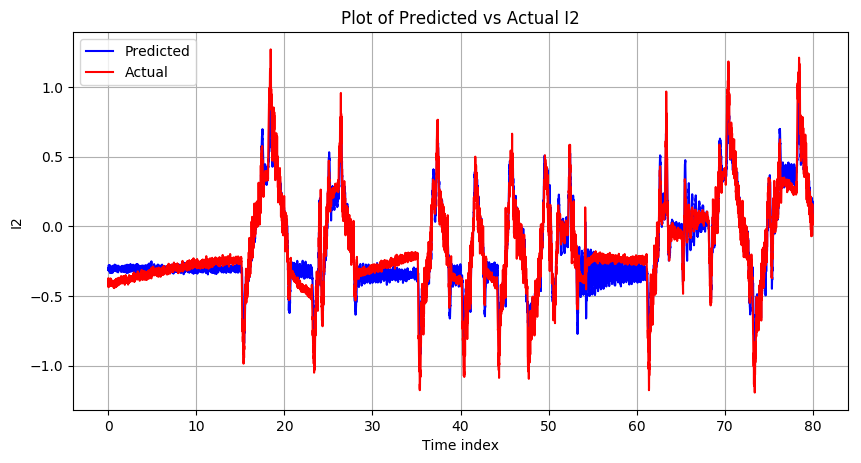

In [34]:
# TODO
fig, axes = plt.subplots(figsize=(10,5), dpi = 100)

axes.plot(t, predictions,'b', label = 'Predicted')
axes.plot(t,ytrain,'r', label = 'Actual')
axes.legend()
axes.set_xlabel('Time index')
axes.set_ylabel('I2')
axes.set_title('Plot of Predicted vs Actual I2')
axes.grid(True)

Measure the normalized RSS given by 
$$
    \frac{RSS}{n s^2_y}.
$$

In [36]:
# TODO
# RSS_train = ...
RSS = np.sum((ytrain - predictions)**2) / 8000
sy2 = np.sum((ytrain - np.mean(ytrain))**2)/8000
nRSS_train = RSS / sy2
print('Normalised RSS on test data = {0}'.format(nRSS_train))

Normalised RSS on test data = 0.09583263861233168


## Measure the Fit on an Indepdent Dataset

Load the data in `exp2.csv`.  Compute the regression predicted values on this data and plot the predicted and actual values over time.

In [37]:
# TODO
url = "https://raw.githubusercontent.com/sdrangan/introml/2801f72d7a4fff0633ede56ba701984f9bb05652/mult_lin_reg/exp2.csv"
names1 =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df_test = pd.read_csv(url, names= names1, index_col=0)

Measure the normalized RSS on the test data.  Is it substantially higher than the training data?

In [38]:
# TODO
xtest = df_test[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest = df_test['I2']
predictions = regr.predict(xtest)


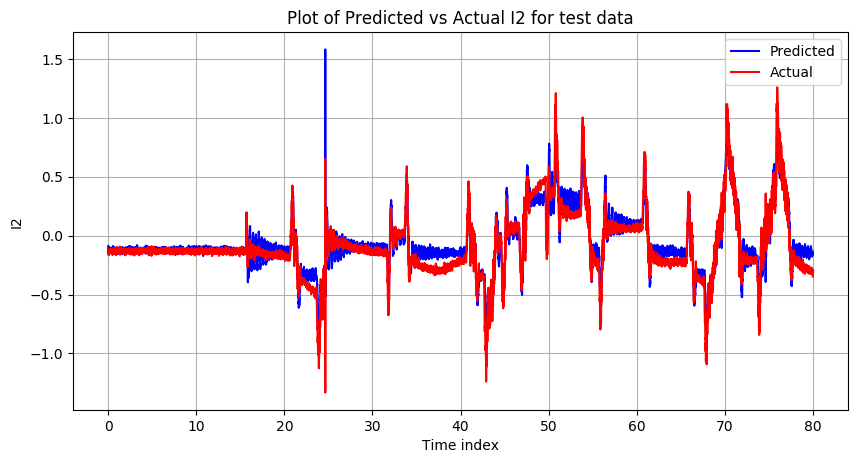

In [39]:
fig, axes = plt.subplots(figsize=(10,5), dpi = 100)

axes.plot(t, predictions,'b', label = 'Predicted')
axes.plot(t,ytest,'r', label = 'Actual')
axes.legend()
axes.set_xlabel('Time index')
axes.set_ylabel('I2')
axes.set_title('Plot of Predicted vs Actual I2 for test data')
axes.grid(True)

In [40]:
RSS = np.sum((ytest - predictions)**2) / 8000
sy2 = np.sum((ytest - np.mean(ytest))**2)/8000
nRSS_test = RSS / sy2
print('Normalised RSS on test data = {0}'.format(nRSS_test))

Normalised RSS on test data = 0.12678048804762418


Normalised RSS on test data is NOT substantially higher than that of train data. Therefore it can be said that the
model has generalised well for the unknown data.

***************************************************

RSS on training data = 0.09583263861233168


RSS on testing data  = 0.12678048804762418

Increase = 0.030947849435292496